In [3]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load('E_field_data_combined_extended.npz' , allow_pickle=True)
print(loaded_data)
E_data_combined = loaded_data['data']
print(type(E_data_combined))  # To check the type of the loaded data
print(E_data_combined.shape)

<class 'numpy.ndarray'>
(9256, 5)


Normalized Training Set X Shape: (6942, 4) X dtype: float32
Normalized Training Set y Shape: (6942, 101, 181) y dtype: float32
Normalized Validation Set X Shape: (1388, 4) X dtype: float32
Normalized Validation Set y Shape: (1388, 101, 181) y dtype: float32
Normalized Test Set X Shape: (926, 4) X dtype: float32
Normalized Test Set y Shape: (926, 101, 181) y dtype: float32
(18281,)
(101, 181)


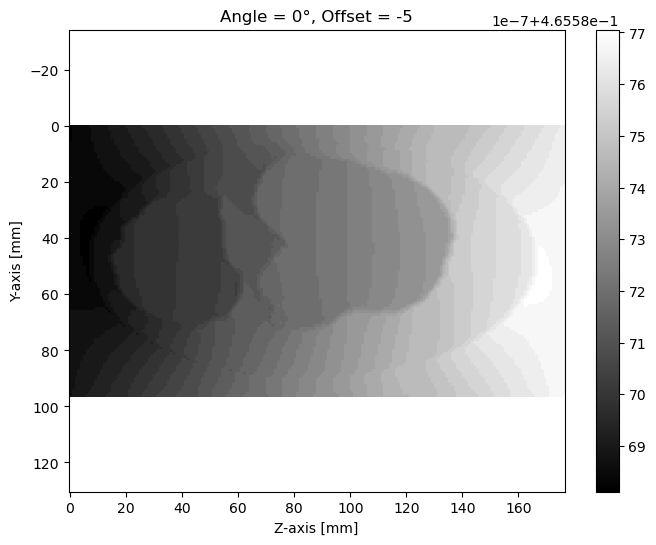

0.4655868
0.4655877


In [74]:
import numpy as np

E_data_combined = loaded_data["data"]

# Split features (first four columns) and matrices (last column)
conditions = E_data_combined[:, :-1].astype(np.float32)  
matrices = np.array([np.array(matrix, dtype=np.float32) for matrix in E_data_combined[:, -1]])

# Normalize conditions
conditions_min = conditions.min(axis=0)
conditions_max = conditions.max(axis=0)
X_normalized = (conditions - conditions_min) / (conditions_max - conditions_min)

# Get the minimum and maximum values of matrices
matrices_min = matrices.min() 
matrices_max = matrices.max()
y_normalized = (matrices - matrices_min) / (matrices_max - matrices_min)

# Randomly shuffle the data to avoid overfitting
num_samples = X_normalized.shape[0]
indices = np.random.permutation(num_samples) 
X_normalized_shuffled = X_normalized[indices]
y_normalized_shuffled = y_normalized[indices]

# Calculate indices for training, validation, and test splits
train_size = int(0.75 * num_samples)
val_size = int(0.15 * num_samples)
test_size = num_samples - train_size - val_size 

# Split the shuffled data into training, validation, and test sets
X_train_1, y_train_1 = X_normalized_shuffled[:train_size], y_normalized_shuffled[:train_size]
X_val_1, y_val_1 = X_normalized_shuffled[train_size:train_size + val_size], y_normalized_shuffled[train_size:train_size + val_size]
X_test_1, y_test_1 = X_normalized_shuffled[train_size + val_size:], y_normalized_shuffled[train_size + val_size:]

# Print detailed information about all normalized and split data sets
print("Normalized Training Set X Shape:", X_train_1.shape, "X dtype:", X_train_1.dtype)
print("Normalized Training Set y Shape:", y_train_1.shape, "y dtype:", y_train_1.dtype)
print("Normalized Validation Set X Shape:", X_val_1.shape, "X dtype:", X_val_1.dtype)
print("Normalized Validation Set y Shape:", y_val_1.shape, "y dtype:", y_val_1.dtype)
print("Normalized Test Set X Shape:", X_test_1.shape, "X dtype:", X_test_1.dtype)
print("Normalized Test Set y Shape:", y_test_1.shape, "y dtype:", y_test_1.dtype)


# Check and reshape y_test_1 for visualization
a_check = y_test_1[0].flatten()
print(a_check.shape)
a_check = a_check.reshape(101, 181)
print(a_check.shape)

# Define slicing parameters for plotting
a = slice(2, 179)  # Adjust for Y-axis (selects rows 2 to 178)
b = slice(2, 99)   # Adjust for Z-axis (selects rows 2 to 98)

# Assuming you want to plot only the first image (index 0)
selected_index = 89
angle, offset, direction, _, Ex_data = E_data_combined[selected_index]

plt.figure(figsize=(8, 6))
img = plt.imshow(a_check[b, a], cmap='gray')  # Visualize only the relevant slice of Ex_data

# Set titles and labels
plt.title(f'Angle = {angle}°, Offset = {offset}')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.axis('equal')  # Maintain equal aspect ratio for better visualization
plt.colorbar(img)  # Add a color bar for scale

# Show the single image
plt.show()
print(a_check[b, a].min())
print(a_check[b, a].max())

In [10]:
print(conditions.shape)
print(conditions_min.shape)
print(matrices_max)
print(matrices_max)
print(matrices_min)

(9256, 4)
(4,)
278.8553
278.8553
-242.94159


2024-10-18 05:00:58.930216: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-10-18 05:01:00.031074: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-18 05:01:00.031554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-18 05:01:00.106754: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA L40S computeCapability: 8.9
coreClock: 2.52GHz coreCount: 142 deviceMemorySize: 47.40GiB deviceMemoryBandwidth: 804.75GiB/s
2024-10-18 05:01:00.106780: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-10-18 05:01:00.117083: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-10-1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_5 (Dense)              (None, 8192)              16785408  
_________________________________________________________________
dense_6 (Dense)              (None, 18281)             1

2024-10-18 05:01:01.797627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-10-18 05:01:01.798602: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2999950000 Hz
2024-10-18 05:01:02.010771: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


217/217 [==============================] - 5s 19ms/step - loss: 2.9414e-04 - accuracy: 0.1029 - val_loss: 1.8570e-05 - val_accuracy: 0.1455
Epoch 2/100
217/217 [==============================] - 4s 18ms/step - loss: 1.6678e-05 - accuracy: 0.1519 - val_loss: 1.7492e-05 - val_accuracy: 0.1434
Epoch 3/100
217/217 [==============================] - 4s 18ms/step - loss: 1.6161e-05 - accuracy: 0.1341 - val_loss: 1.7060e-05 - val_accuracy: 0.1419
Epoch 4/100
217/217 [==============================] - 4s 18ms/step - loss: 1.5051e-05 - accuracy: 0.1425 - val_loss: 1.6801e-05 - val_accuracy: 0.1275
Epoch 5/100
217/217 [==============================] - 4s 18ms/step - loss: 1.5883e-05 - accuracy: 0.1589 - val_loss: 1.3317e-05 - val_accuracy: 0.1419
Epoch 6/100
217/217 [==============================] - 4s 18ms/step - loss: 1.2196e-05 - accuracy: 0.1795 - val_loss: 1.0892e-05 - val_accuracy: 0.2608
Epoch 7/100
217/217 [==============================] - 4s 18ms/step - loss: 1.0720e-05 - accuracy: 0

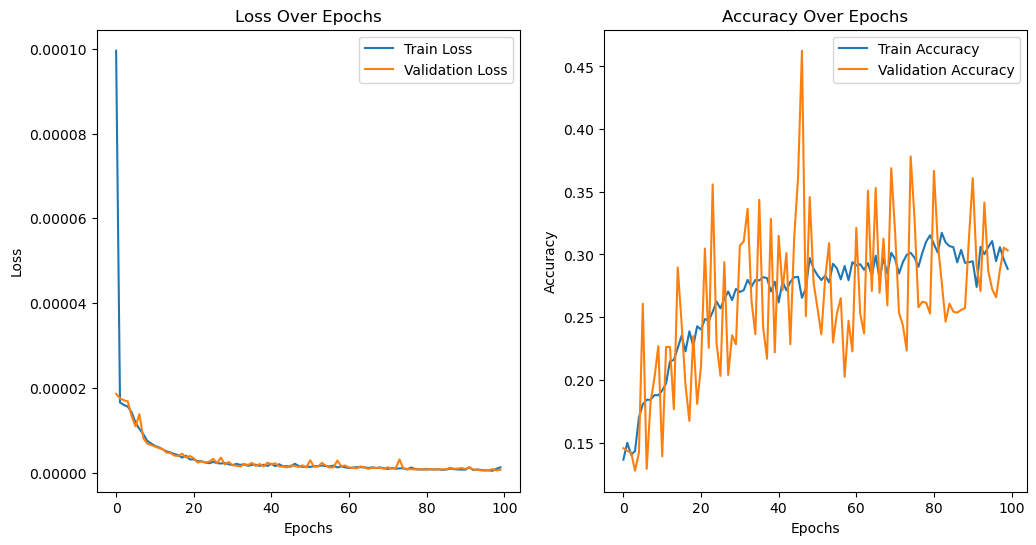

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_1.shape[1],)),  # Input layer
    Dense(2**5, activation='relu'),
    Dense(2**7, activation='relu'),
    Dense(2**9, activation='relu'),
    Dense(2**11, activation='relu'),
    Dense(2**13, activation='relu'),
    Dense(18281, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

# Print model summary
model.summary()

# # Train the model
# history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1),  # Reshape y_train for training
#                     validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)),
#                     epochs=100, batch_size=32, verbose=1)
# Train the model
history = model.fit(X_train_1, y_train_1.reshape(y_train_1.shape[0], -1),  # Reshape y_train for training
                    validation_data=(X_val_1, y_val_1.reshape(y_val_1.shape[0], -1)),
                    epochs=100, batch_size=32, verbose=1)
# Plotting
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)


model is overfitting , so trying with some learning rate 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_6 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)              

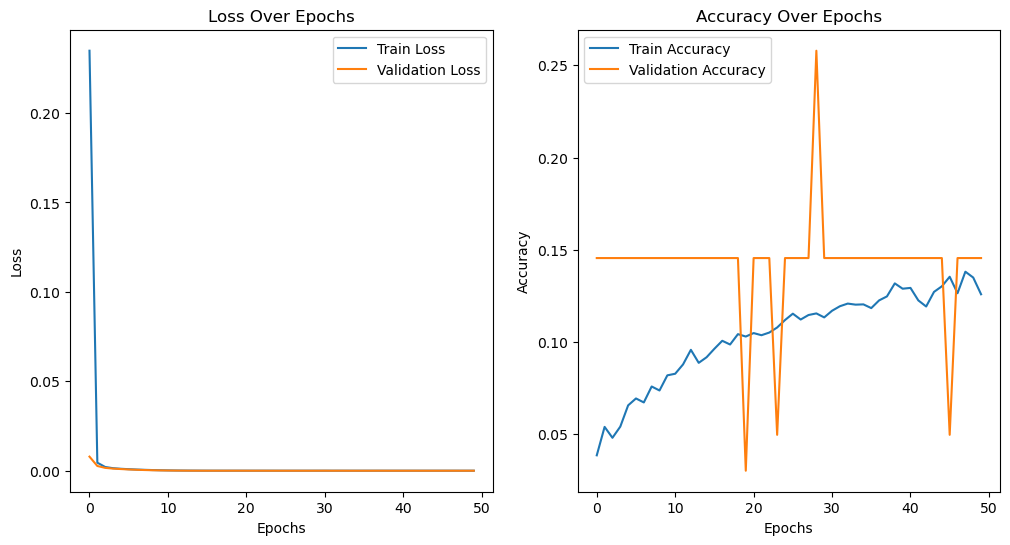

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the model with L2 regularization and Dropout
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_1.shape[1],), kernel_regularizer=l2(0.001)),  # Input layer with L2 regularization
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(2**5, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**7, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**9, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**11, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**13, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(18281, activation='linear')  # Output layer
])
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])
model.summary()

# Flatten y_train and y_val for training
y_train_flat = np.array([y.reshape(-1) for y in y_train_1])
y_val_flat = np.array([y.reshape(-1) for y in y_val_1])

# Train the model
history = model.fit(X_train_1, y_train_flat,
                    validation_data=(X_val_1, y_val_flat),
                    epochs=50, batch_size=32, verbose=1)

# Plotting
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)


In [7]:
import json
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

In [8]:
model.save('mode_1')

2024-10-18 05:55:05.253368: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mode_1/assets


In [12]:
# Predict using the trained model on the test set
from tensorflow.keras.models import load_model
model = load_model('mode_1')
y_pred = model.predict(X_test_1)

# Reshape y_test for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])

# Calculate the mean squared error on the test set
from sklearn.metrics import mean_absolute_error
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MAE:", test_mse)

# Optionally, calculate R-squared (optional)
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test_flat, y_pred)
print("Test R^2 Score:", test_r2)

# Predict on some test samples and compare to the actual values from y_train
for i in range(5):  # Check the first 5 predictions
    print(f"Sample {i} Prediction vs Actual:")
    print("Predicted:", y_pred[i][:10])  # Print first 10 values of the predicted output
    print("Actual:", y_test_flat[i][:10])  # Print first 10 values of the actual output


Test MAE: 0.00216799
Test R^2 Score: -6236.626805629068
Sample 0 Prediction vs Actual:
Predicted: [0.46351928 0.46352166 0.46351942 0.4634718  0.46371332 0.46359372
 0.46354768 0.46370333 0.46354184 0.46357793]
Actual: [0.4655925  0.46559247 0.46559244 0.4655924  0.46559238 0.46559238
 0.46559235 0.46559232 0.4655923  0.46559227]
Sample 1 Prediction vs Actual:
Predicted: [0.46351928 0.46352166 0.46351942 0.4634718  0.46371332 0.46359372
 0.46354768 0.46370333 0.46354184 0.46357793]
Actual: [0.4655898  0.46558973 0.46558964 0.46558955 0.46558952 0.46558946
 0.4655894  0.4655893  0.46558923 0.4655892 ]
Sample 2 Prediction vs Actual:
Predicted: [0.46351928 0.46352166 0.46351942 0.4634718  0.46371332 0.46359372
 0.46354768 0.46370333 0.46354184 0.46357793]
Actual: [0.46558774 0.46558774 0.4655877  0.46558768 0.46558768 0.46558768
 0.46558765 0.46558765 0.46558762 0.46558762]
Sample 3 Prediction vs Actual:
Predicted: [0.46351928 0.46352166 0.46351942 0.4634718  0.46371332 0.46359372
 0.4635

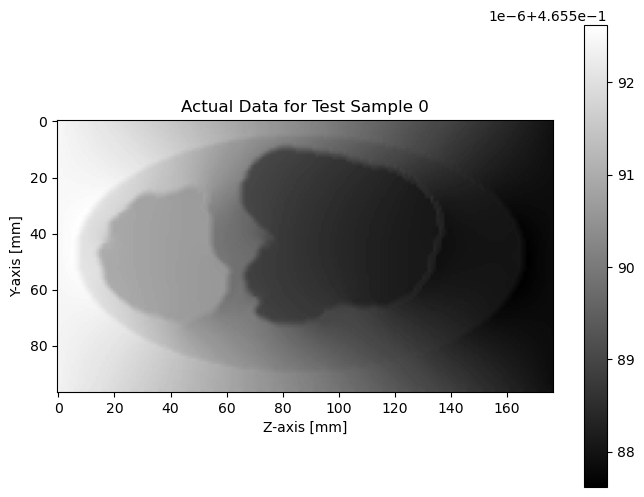

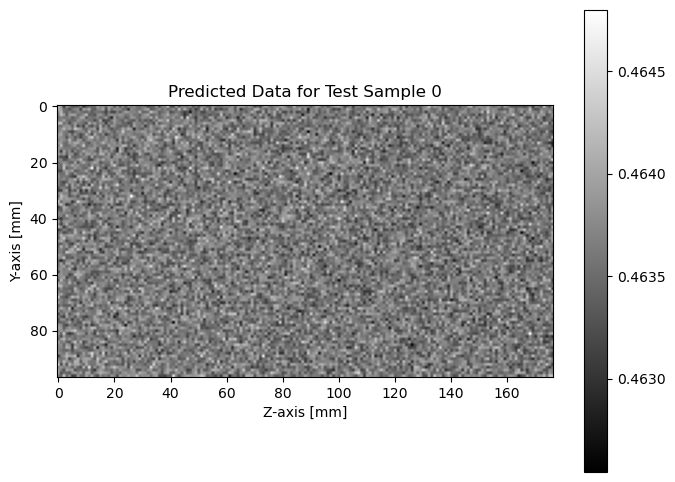

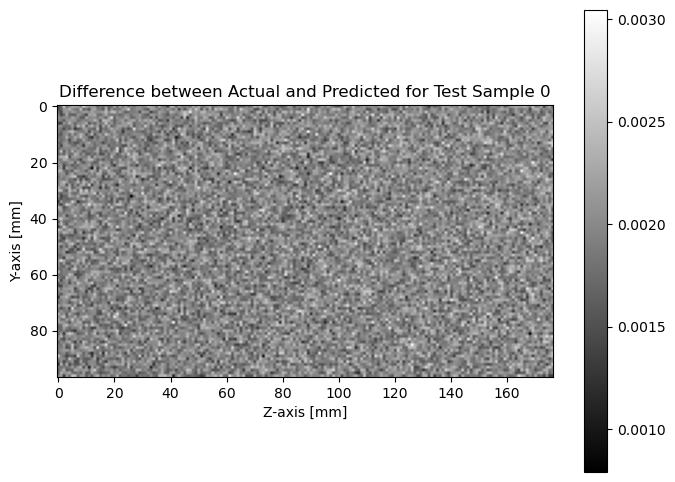

Sample 0 Prediction vs Actual (Flattened):
Predicted (First 1 values): [0.46351928]
Actual (First 1 values): [0.4655925]




In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape y_test and y_pred for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_pred_flat = np.array([y.reshape(-1) for y in y_pred])

# Define the indices to plot (first 5 samples)
indices_to_plot = range(1)

# Define slicing parameters for plotting (same as before)
a = slice(2, 179)  # Y-axis (rows)
b = slice(2, 99)   # Z-axis (rows)

# Plotting the first 5 samples
for selected_index in indices_to_plot:
    # Reshape the selected test and predicted data back to (101, 181)
    y_test_selected = y_test_flat[selected_index].reshape(101, 181)
    y_pred_selected = y_pred_flat[selected_index].reshape(101, 181)
    
    # Plot actual data
    plt.figure(figsize=(8, 6))
    img_actual = plt.imshow(y_test_selected[b, a], cmap='gray')  # Plot actual data slice
    plt.title(f'Actual Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_actual)  # Add a color bar for scale
    plt.show()

    # Plot predicted data
    plt.figure(figsize=(8, 6))
    img_pred = plt.imshow(y_pred_selected[b, a], cmap='gray')  # Plot predicted data slice
    plt.title(f'Predicted Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_pred)  # Add a color bar for scale
    plt.show()

    # Plot difference between actual and predicted
    plt.figure(figsize=(8, 6))
    img_diff = plt.imshow(np.abs(y_test_selected[b, a] - y_pred_selected[b, a]), cmap='gray')  # Plot difference
    plt.title(f'Difference between Actual and Predicted for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_diff)  # Add a color bar for scale
    plt.show()

    # Print the actual vs predicted values (flattened for comparison)
    print(f"Sample {selected_index} Prediction vs Actual (Flattened):")
    print("Predicted (First 1 values):", y_pred_flat[selected_index][:1])
    print("Actual (First 1 values):", y_test_flat[selected_index][:1])
    print("\n")


now , renormalized the dataset and predicted dataset then visulized the dataset

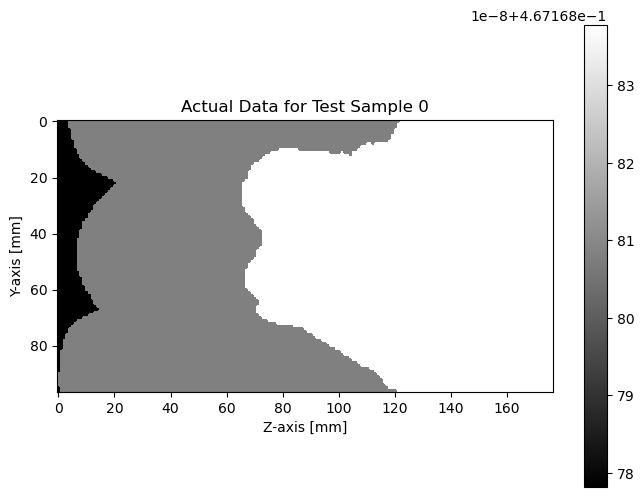

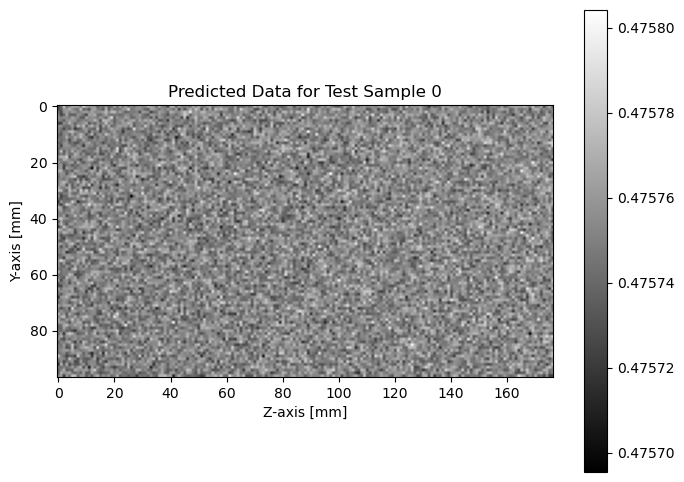

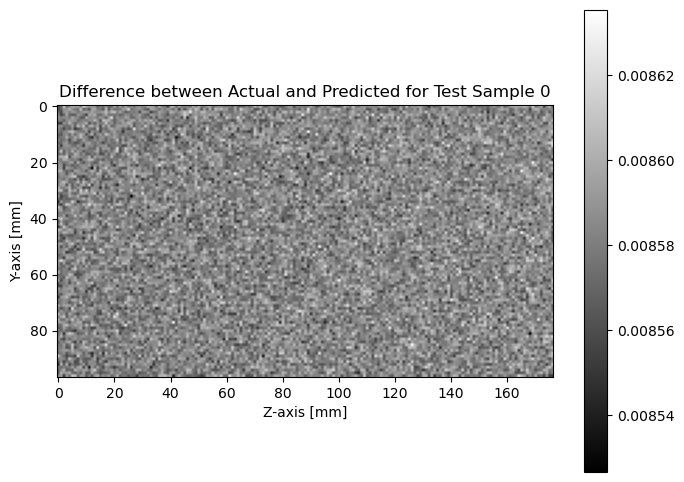

Sample 0 Prediction vs Actual (Flattened):
Predicted (First 1 values): [0.46351928 0.46352166 0.46351942 0.4634718  0.46371332 0.46359372
 0.46354768 0.46370333 0.46354184 0.46357793]
Actual (First 1 values): [0.4655925  0.46559247 0.46559244 0.4655924  0.46559238 0.46559238
 0.46559235 0.46559232 0.4655923  0.46559227]




In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape y_test and y_pred for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_pred_flat = np.array([y.reshape(-1) for y in y_pred])

# Define the indices to plot (first 5 samples)
indices_to_plot = range(1)

# Define slicing parameters for plotting (same as before)
a = slice(2, 179)  # Y-axis (rows)
b = slice(2, 99)   # Z-axis (rows)

# Plotting the first 5 samples
for selected_index in indices_to_plot:
    # Reshape the selected test and predicted data back to (101, 181)
    y_test_selected = y_test_flat[selected_index].reshape(101, 181)
    y_pred_selected = y_pred_flat[selected_index].reshape(101, 181)
    
    max_y_test_selected = y_test_selected.min()
    min_y_test_selected = y_test_selected.max()

    y_test_selected = (max_y_test_selected - min_y_test_selected)*y_test_selected + min_y_test_selected
    
    max_y_pred_selected = y_pred_selected.min()
    min_y_pred_selected = y_pred_selected.max()

    y_pred_selected = (max_y_pred_selected - min_y_pred_selected)*y_pred_selected + min_y_pred_selected
    
    # Plot actual data
    plt.figure(figsize=(8, 6))
    img_actual = plt.imshow(y_test_selected[b, a], cmap='gray')  # Plot actual data slice
    plt.title(f'Actual Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_actual)  # Add a color bar for scale
    plt.show()

    # Plot predicted data
    plt.figure(figsize=(8, 6))
    img_pred = plt.imshow(y_pred_selected[b, a], cmap='gray')  # Plot predicted data slice
    plt.title(f'Predicted Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_pred)  # Add a color bar for scale
    plt.show()

    # Plot difference between actual and predicted
    plt.figure(figsize=(8, 6))
    img_diff = plt.imshow(np.abs(y_test_selected[b, a] - y_pred_selected[b, a]), cmap='gray')  # Plot difference
    plt.title(f'Difference between Actual and Predicted for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_diff)  # Add a color bar for scale
    plt.show()

    # Print the actual vs predicted values (flattened for comparison)
    print(f"Sample {selected_index} Prediction vs Actual (Flattened):")
    print("Predicted (First 1 values):", y_pred_flat[selected_index][:10])
    print("Actual (First 1 values):", y_test_flat[selected_index][:10])
    print("\n")


Now , we are update the code and use the the check point and droupout and earily stopping  

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_20 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)              

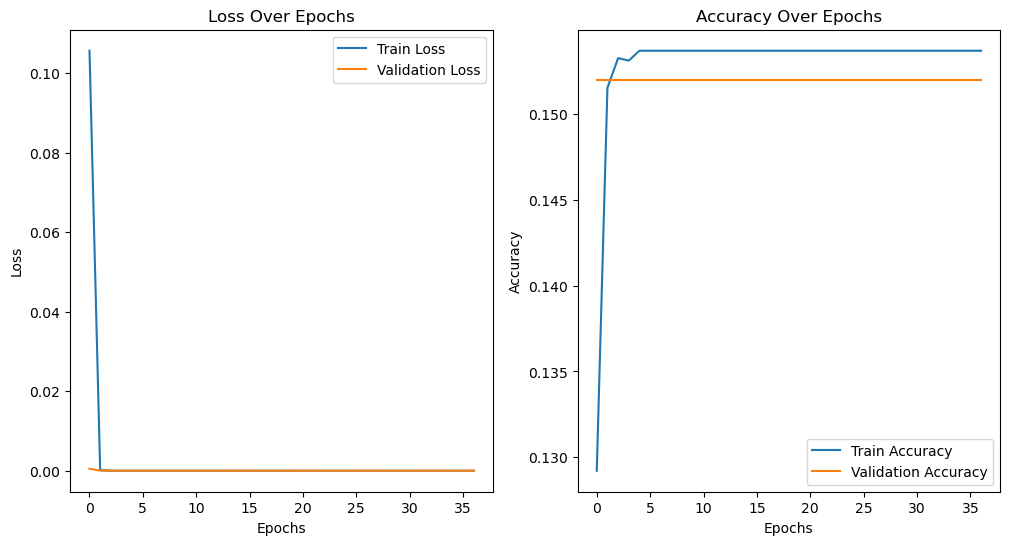

: 

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Define the model with L2 regularization and Dropout
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_1.shape[1],), kernel_regularizer=l2(0.001)),  # Input layer with L2 regularization
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(2**5, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**7, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**9, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**11, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**13, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(18281, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

# Create callbacks for early stopping and model checkpoints
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Print model summary
model.summary()

# Assuming X_train, y_train_flat, X_val, y_val_flat are defined and prepared
y_train_flat = np.array([y.reshape(-1) for y in y_train_1])
y_val_flat = np.array([y.reshape(-1) for y in y_val_1])

# Train the model with the callbacks
history = model.fit(X_train_1, y_train_flat,
                    validation_data=(X_val_1, y_val_flat),
                    epochs=100, batch_size=16, verbose=1,
                    callbacks=[checkpoint, early_stopping])

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plotting the training history
plot_history(history)


In [9]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('best_model.h5')
model.summary()

y_pred_best_model = model.predict(X_test_1)
print(y_pred_best_model.shape)
y_max = y_pred_best_model.max()
y_min = y_pred_best_model.min()
print("y_max",y_max)
print("y_min", y_min)
y_pred_best_model_result = (y_max -y_min)*y_pred_best_model
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_max_1 = y_test_flat.max()
y_min_1 = y_test_flat.min()
print("y_max_1", y_max_1)
print("y_min_1", y_min_1)
y_test_flat_result = (y_max_1 -y_min_1)*y_test_flat
from sklearn.metrics import mean_absolute_error
test_mse = mean_absolute_error(y_test_flat_result, y_pred_best_model_result)
print("Test MAE:", test_mse)
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test_flat, y_pred_best_model)
print("Test R^2 Score:", test_r2)
for i in range(5):  
    print(f"Sample {i} Prediction vs Actual:")
    print("Predicted:", y_pred_best_model[i][:10])  # Print first 10 values of the predicted output
    print("Actual:", y_test_flat[i][:10])  # Print first 10 values of the actual output


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               6

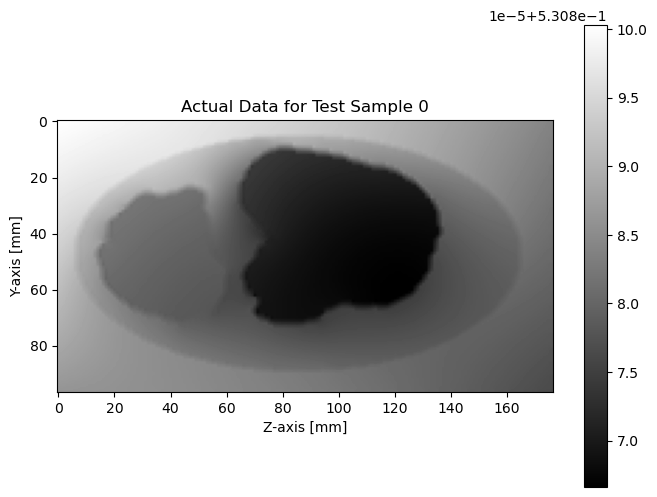

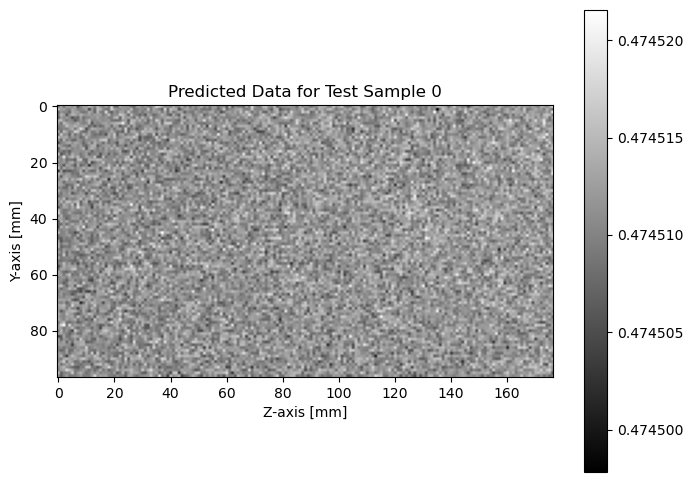

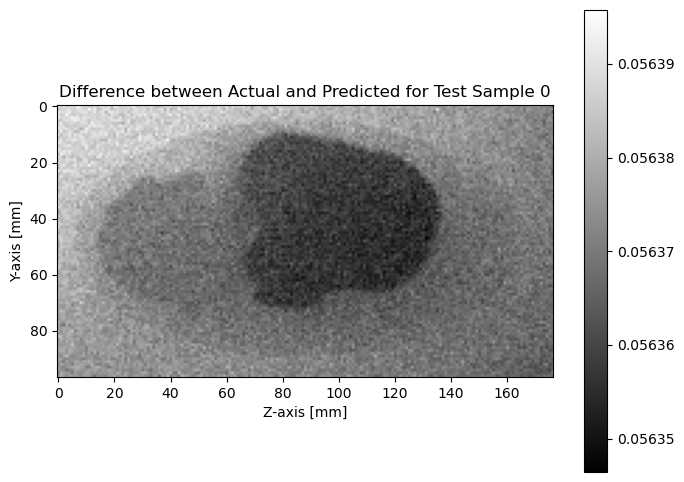

Sample 0 Prediction vs Actual (Flattened):
Predicted (First 10 values): [0.46565226 0.46560553 0.46566704 0.46560243 0.46563748 0.465643
 0.46555448 0.4656301  0.46544018 0.46561897]
Actual (First 10 values): [0.46515155 0.46515197 0.4651523  0.4651526  0.4651527  0.4651529
 0.46515307 0.46515343 0.46515375 0.4651539 ]




In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape y_test and y_pred for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_pred_flat = np.array([y.reshape(-1) for y in y_pred_best_model])
indices_to_plot = range(1)

# Define slicing parameters for plotting (same as before)
a = slice(2, 179)  # Y-axis (rows)
b = slice(2, 99)   # Z-axis (rows)

# Plotting the first 5 samples
for selected_index in indices_to_plot:
    # Reshape the selected test and predicted data back to (101, 181)
    y_test_selected = y_test_flat[selected_index].reshape(101, 181)
    y_pred_selected = y_pred_flat[selected_index].reshape(101, 181)

    max_y_test_selected = y_test_selected.min()
    min_y_test_selected = y_test_selected.max()

    y_test_selected = (max_y_test_selected - min_y_test_selected)*y_test_selected + min_y_test_selected
    
    max_y_pred_selected = y_pred_selected.min()
    min_y_pred_selected = y_pred_selected.max()

    y_pred_selected = (max_y_pred_selected - min_y_pred_selected)*y_pred_selected + min_y_pred_selected
    
    # Plot actual data
    plt.figure(figsize=(8, 6))
    img_actual = plt.imshow(y_test_selected[b, a], cmap='gray')  # Plot actual data slice
    plt.title(f'Actual Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_actual)  # Add a color bar for scale
    plt.show()

    # Plot predicted data
    plt.figure(figsize=(8, 6))
    img_pred = plt.imshow(y_pred_selected[b, a], cmap='gray')  # Plot predicted data slice
    plt.title(f'Predicted Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_pred)  # Add a color bar for scale
    plt.show()

    # Plot difference between actual and predicted
    plt.figure(figsize=(8, 6))
    img_diff = plt.imshow(np.abs(y_test_selected[b, a] - y_pred_selected[b, a]), cmap='gray')  # Plot difference
    plt.title(f'Difference between Actual and Predicted for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_diff)  # Add a color bar for scale
    plt.show()

    # Print the actual vs predicted values (flattened for comparison)
    print(f"Sample {selected_index} Prediction vs Actual (Flattened):")
    print("Predicted (First 10 values):", y_pred_flat[selected_index][:10])
    print("Actual (First 10 values):", y_test_flat[selected_index][:10])
    print("\n")


In [24]:
# Predict using the trained model on the test set
from tensorflow.keras.models import load_model
# Load the model
model = load_model('best_model.h5')

# Print the summary of the loaded model
model.summary()
y_pred = model.predict(X_test_1)
y_pred_result = (matrices_max-matrices_min)*y_pred

# Reshape y_test for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_test_result = (matrices_max- matrices_min)*y_test_flat

# Calculate the mean squared error on the test set
from sklearn.metrics import mean_absolute_error
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", test_mse)
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", (matrices_max- matrices_min)*test_mse)
test_mse_res = mean_absolute_error(y_test_result, y_pred_result)
print("Test MSE:", test_mse_res)

# Optionally, calculate R-squared (optional)
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test_flat, y_pred)
print("Test R^2 Score:", test_r2)

# Predict on some test samples and compare to the actual values from y_train
for i in range(5):  # Check the first 5 predictions
    print(f"Sample {i} Prediction vs Actual:")
    print("Predicted:", y_pred[i][:10])  # Print first 10 values of the predicted output
    print("Actual:", y_test_flat[i][:10])  # Print first 10 values of the actual output

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               6

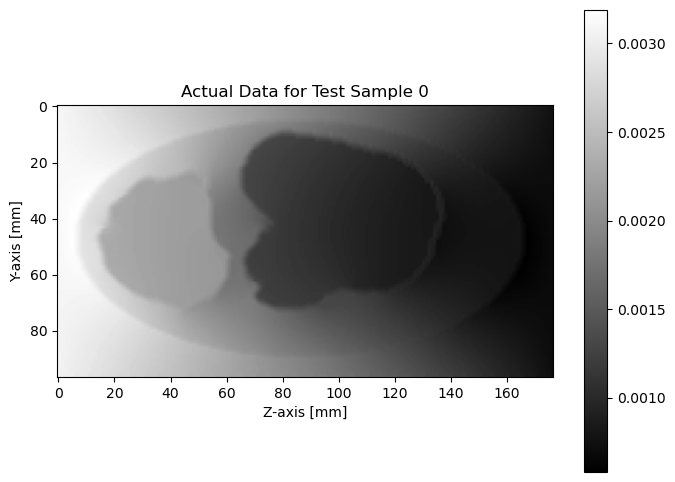

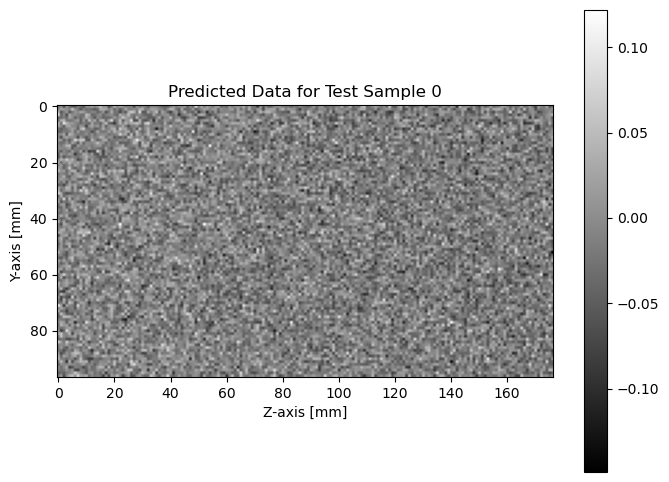

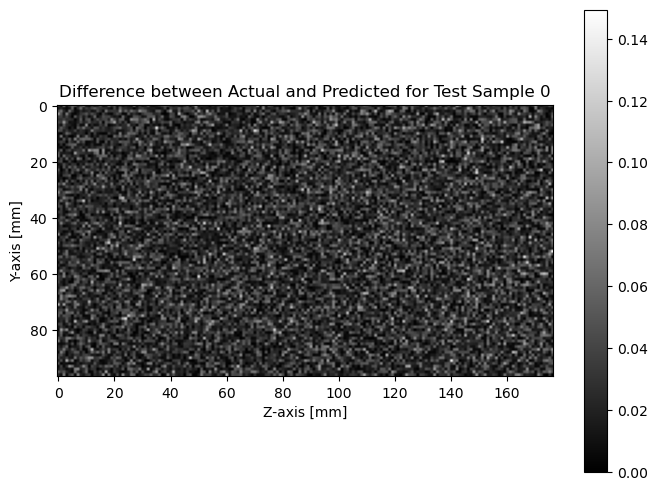

Sample 0 Prediction vs Actual (Flattened):
Predicted (First 10 values): [0.46553507 0.46555585 0.4656386  0.4655935  0.46557337 0.4655026
 0.46548596 0.4655713  0.4655992  0.46551126]
Actual (First 10 values): [0.4655925  0.46559247 0.46559244 0.4655924  0.46559238 0.46559238
 0.46559235 0.46559232 0.4655923  0.46559227]




In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape y_test and y_pred for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_pred_flat = np.array([y.reshape(-1) for y in y_pred_best_model])
indices_to_plot = range(1)

# Define slicing parameters for plotting (same as before)
a = slice(2, 179)  # Y-axis (rows)
b = slice(2, 99)   # Z-axis (rows)

# Plotting the first 5 samples
for selected_index in indices_to_plot:
    # Reshape the selected test and predicted data back to (101, 181)
    y_test_selected = y_test_flat[selected_index].reshape(101, 181)
    y_pred_selected = y_pred_flat[selected_index].reshape(101, 181)

    y_test_selected = (matrices_max- matrices_min)*y_test_selected + matrices_min

    y_pred_selected = (matrices_max - matrices_min)*y_pred_selected + matrices_min
    
    # Plot actual data
    plt.figure(figsize=(8, 6))
    img_actual = plt.imshow(y_test_selected[b, a], cmap='gray')  # Plot actual data slice
    plt.title(f'Actual Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_actual)  # Add a color bar for scale
    plt.show()

    # Plot predicted data
    plt.figure(figsize=(8, 6))
    img_pred = plt.imshow(y_pred_selected[b, a], cmap='gray')  # Plot predicted data slice
    plt.title(f'Predicted Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_pred)  # Add a color bar for scale
    plt.show()

    # Plot difference between actual and predicted
    plt.figure(figsize=(8, 6))
    img_diff = plt.imshow(np.abs(y_test_selected[b, a] - y_pred_selected[b, a]), cmap='gray')  # Plot difference
    plt.title(f'Difference between Actual and Predicted for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_diff)  # Add a color bar for scale
    plt.show()

    # Print the actual vs predicted values (flattened for comparison)
    print(f"Sample {selected_index} Prediction vs Actual (Flattened):")
    print("Predicted (First 10 values):", y_pred_flat[selected_index][:10])
    print("Actual (First 10 values):", y_test_flat[selected_index][:10])
    print("\n")


For most models, a starting learning rate of 0.001 with exponential decay or reduce on plateau is a great balance for models using L2 regularization.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_18 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)              

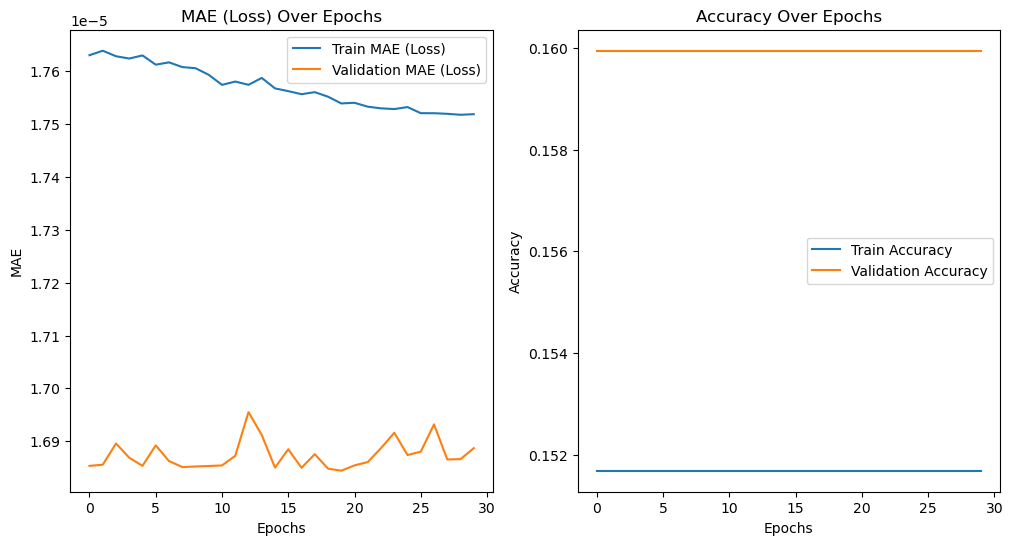

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import numpy as np
import matplotlib.pyplot as plt

# Learning rate schedule with exponential decay
initial_learning_rate = 0.001  # Start with 0.001, adjust if needed
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True
)

# Compile the model with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
# Create callbacks for early stopping and model checkpoints
checkpoint = ModelCheckpoint('best_model_final.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model.summary()

# Assuming X_train, y_train_flat, X_val, y_val_flat are defined and prepared
y_train_flat = np.array([y.reshape(-1) for y in y_train_1])
y_val_flat = np.array([y.reshape(-1) for y in y_val_1])

# Train the model with the callbacks
history = model.fit(X_train_1, y_train_flat,
                    validation_data=(X_val_1, y_val_flat),
                    epochs=50, batch_size=32, verbose=1,
                    callbacks=[checkpoint, early_stopping])

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot for Loss (MAE)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train MAE (Loss)')
    plt.plot(history.history['val_loss'], label='Validation MAE (Loss)')
    plt.title('MAE (Loss) Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    # Plot for Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plotting the training history
plot_history(history)

In [67]:
# Predict using the trained model on the test set
from tensorflow.keras.models import load_model
# Load the model
model = load_model('best_model_final.h5')

# Print the summary of the loaded model
model.summary()
y_pred = model.predict(X_test_1)
y_pred_result = (matrices_max-matrices_min)*y_pred

# Reshape y_test for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_test_result = (matrices_max- matrices_min)*y_test_flat

# Calculate the mean squared error on the test set
from sklearn.metrics import mean_absolute_error
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", test_mse)
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", (matrices_max- matrices_min)*test_mse)
test_mse_res = mean_absolute_error(y_test_result, y_pred_result)
print("Test MSE:", test_mse_res)

# Optionally, calculate R-squared (optional)
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test_flat, y_pred)
print("Test R^2 Score:", test_r2)

# Predict on some test samples and compare to the actual values from y_train
for i in range(5):  # Check the first 5 predictions
    print(f"Sample {i} Prediction vs Actual:")
    print("Predicted:", y_pred[i][:10])  # Print first 10 values of the predicted output
    print("Actual:", y_test_flat[i][:10])  # Print first 10 values of the actual output

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_18 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)              

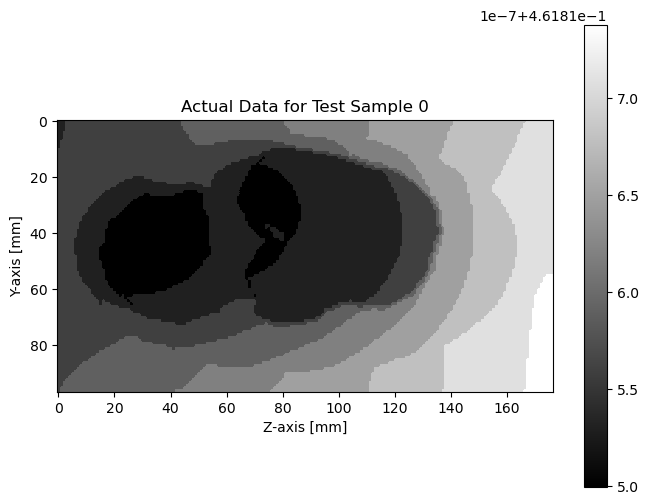

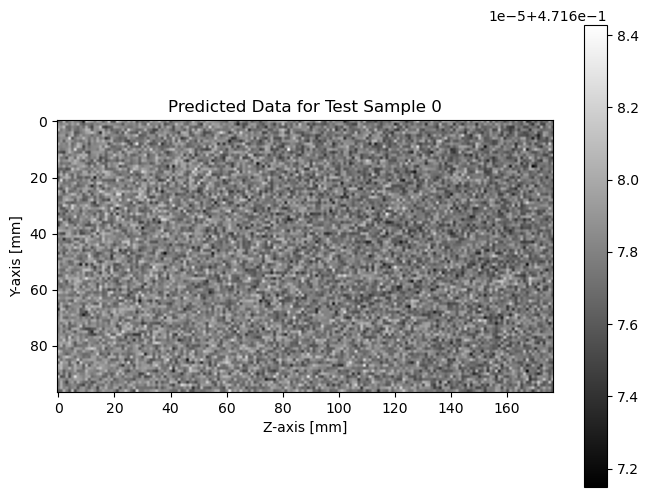

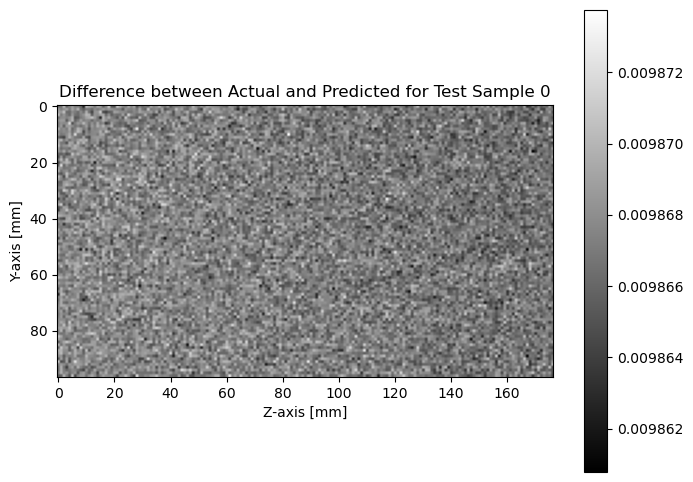

Sample 0 Prediction vs Actual (Flattened):
Predicted (First 10 values): [0.46551317 0.46555886 0.46557117 0.46562165 0.46551725 0.46548513
 0.46551308 0.4655583  0.46559525 0.46553415]
Actual (First 10 values): [0.46555173 0.46555176 0.4655518  0.46555182 0.46555185 0.46555185
 0.46555188 0.4655519  0.46555197 0.46555197]




In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape y_test and y_pred for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_pred_flat = np.array([y.reshape(-1) for y in y_pred])

# Define the indices to plot (first 5 samples)
indices_to_plot = range(1)

# Define slicing parameters for plotting (same as before)
a = slice(2, 179)  # Y-axis (rows)
b = slice(2, 99)   # Z-axis (rows)

# Plotting the first 5 samples
for selected_index in indices_to_plot:
    # Reshape the selected test and predicted data back to (101, 181)
    y_test_selected = y_test_flat[selected_index].reshape(101, 181)
    y_pred_selected = y_pred_flat[selected_index].reshape(101, 181)

    max_y_test_selected = y_test_selected.max()
    min_y_test_selected = y_test_selected.min()

    y_test_selected = (max_y_test_selected - min_y_test_selected)*y_test_selected + min_y_test_selected
    
    max_y_pred_selected = y_pred_selected.max()
    min_y_pred_selected = y_pred_selected.min()

    y_pred_selected = (max_y_pred_selected - min_y_pred_selected)*y_pred_selected + min_y_pred_selected
    
    # Plot actual data
    plt.figure(figsize=(8, 6))
    img_actual = plt.imshow(y_test_selected[b, a], cmap='gray')  # Plot actual data slice
    plt.title(f'Actual Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_actual)  # Add a color bar for scale
    plt.show()

    # Plot predicted data
    plt.figure(figsize=(8, 6))
    img_pred = plt.imshow(y_pred_selected[b, a], cmap='gray')  # Plot predicted data slice
    plt.title(f'Predicted Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_pred)  # Add a color bar for scale
    plt.show()

    # Plot difference between actual and predicted
    plt.figure(figsize=(8, 6))
    img_diff = plt.imshow(np.abs(y_test_selected[b, a] - y_pred_selected[b, a]), cmap='gray')  # Plot difference
    plt.title(f'Difference between Actual and Predicted for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_diff)  # Add a color bar for scale
    plt.show()

    # Print the actual vs predicted values (flattened for comparison)
    print(f"Sample {selected_index} Prediction vs Actual (Flattened):")
    print("Predicted (First 10 values):", y_pred_flat[selected_index][:10])
    print("Actual (First 10 values):", y_test_flat[selected_index][:10])
    print("\n")


Now , we train the model to half then try Upsampleing to reduce the time and computaion cost of neural network


Epoch 1/100
217/217 [==============================] - 1s 5ms/step - loss: 0.2811 - accuracy: 0.0149 - val_loss: 0.0027 - val_accuracy: 0.0512

Epoch 00001: val_loss improved from inf to 0.00270, saving model to best_model_small.h5
Epoch 2/100
217/217 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 0.0256 - val_loss: 4.5756e-04 - val_accuracy: 0.0267

Epoch 00002: val_loss improved from 0.00270 to 0.00046, saving model to best_model_small.h5
Epoch 3/100
217/217 [==============================] - 1s 6ms/step - loss: 3.3730e-04 - accuracy: 0.0251 - val_loss: 1.1367e-04 - val_accuracy: 0.0267

Epoch 00003: val_loss improved from 0.00046 to 0.00011, saving model to best_model_small.h5
Epoch 4/100
217/217 [==============================] - 1s 6ms/step - loss: 8.8210e-05 - accuracy: 0.0285 - val_loss: 3.3209e-05 - val_accuracy: 0.0267

Epoch 00004: val_loss improved from 0.00011 to 0.00003, saving model to best_model_small.h5
Epoch 5/100
217/217 [===================

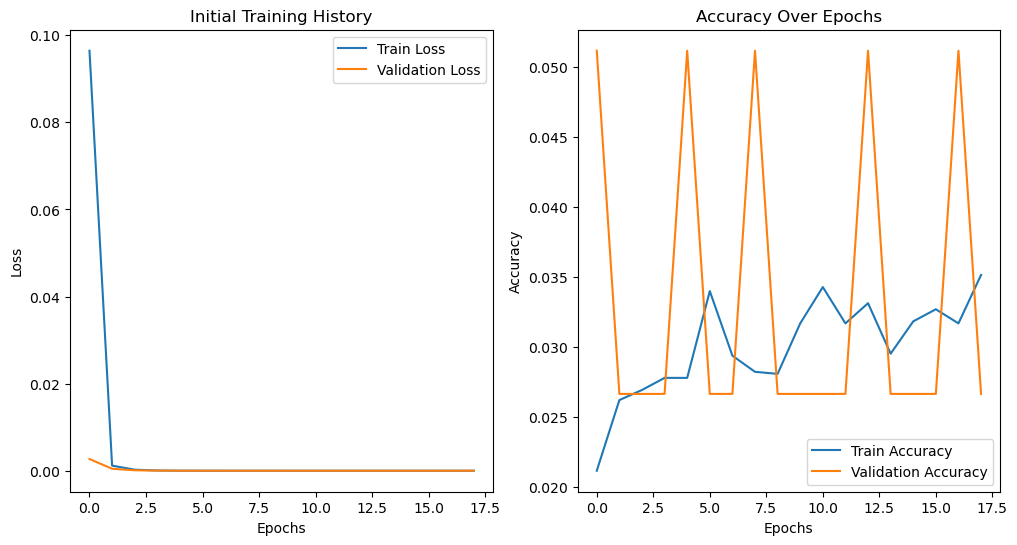

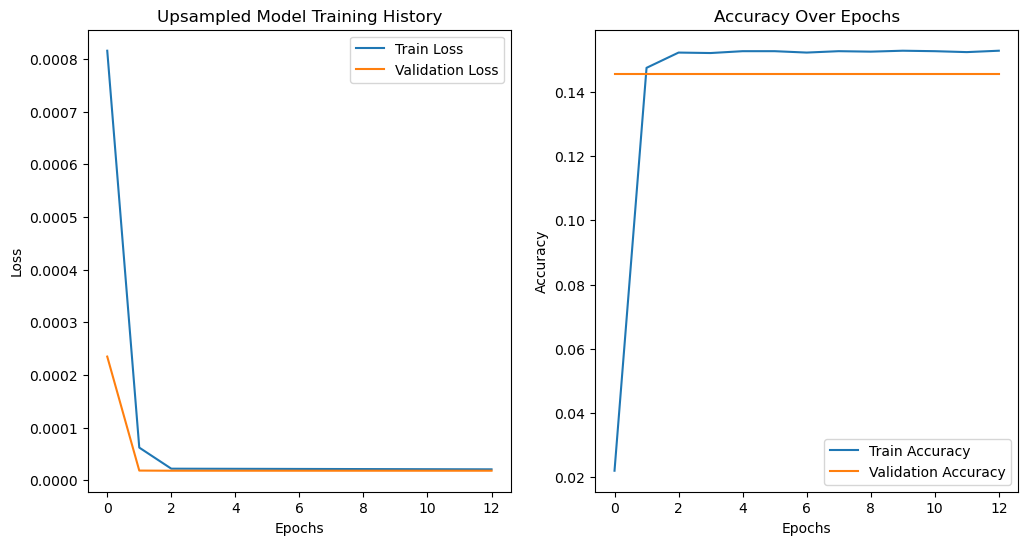

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

model_small = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_1.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**5, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**7, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**9, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**11, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(8192, activation='sigmoid') 
])

model_small.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])
checkpoint_small = ModelCheckpoint('best_model_small.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
early_stopping_small = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


history_small = model_small.fit(
    X_train_1, y_train_flat[:, :8192],
    validation_data=(X_val_1, y_val_flat[:, :8192]),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint_small, early_stopping_small]
)

# Upsample the model by adding a new output layer for the full output size
model_upsampled = Sequential(model_small.layers[:-1]) 
model_upsampled.add(Dense(18281, activation='sigmoid')) 

# Compile the upsampled model
model_upsampled.compile(optimizer=Adam(1e-4), loss='mse', metrics=['accuracy'])
checkpoint_upsampled = ModelCheckpoint('best_model_upsampled.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
early_stopping_upsampled = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the upsampled model on the full set of labels
history_upsampled = model_upsampled.fit(
    X_train_1, y_train_flat, 
    validation_data=(X_val_1, y_val_flat),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint_upsampled, early_stopping_upsampled]
)

# Function to plot training history
def plot_history(history, title='Model Training History'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plotting the training history for both phases
plot_history(history_small, 'Initial Training History')
plot_history(history_upsampled, 'Upsampled Model Training History')


In [70]:
# Predict using the trained model on the test set
from tensorflow.keras.models import load_model
# Load the model
model = load_model('best_model_upsampled.h5')

# Print the summary of the loaded model
model.summary()
y_pred = model.predict(X_test_1)
y_pred_result = (matrices_max-matrices_min)*y_pred

# Reshape y_test for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_test_result = (matrices_max- matrices_min)*y_test_flat

# Calculate the mean squared error on the test set
from sklearn.metrics import mean_absolute_error
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", test_mse)
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", (matrices_max- matrices_min)*test_mse)
test_mse_res = mean_absolute_error(y_test_result, y_pred_result)
print("Test MSE:", test_mse_res)

# Optionally, calculate R-squared (optional)
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test_flat, y_pred)
print("Test R^2 Score:", test_r2)

# Predict on some test samples and compare to the actual values from y_train
for i in range(5):  # Check the first 5 predictions
    print(f"Sample {i} Prediction vs Actual:")
    print("Predicted:", y_pred[i][:10])  # Print first 10 values of the predicted output
    print("Actual:", y_test_flat[i][:10])  # Print first 10 values of the actual output

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_39 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_40 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)             

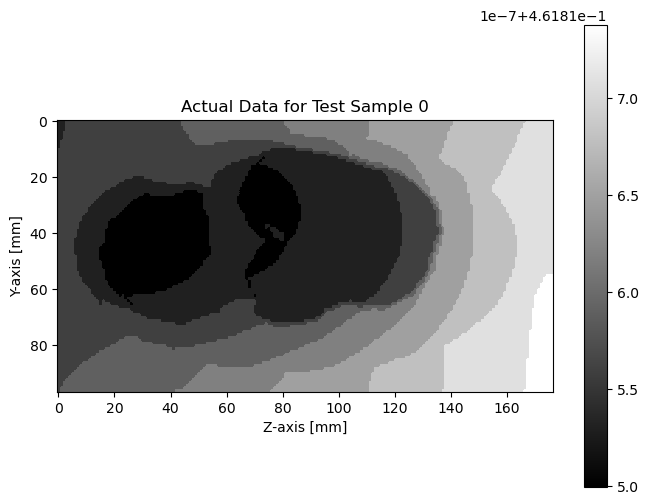

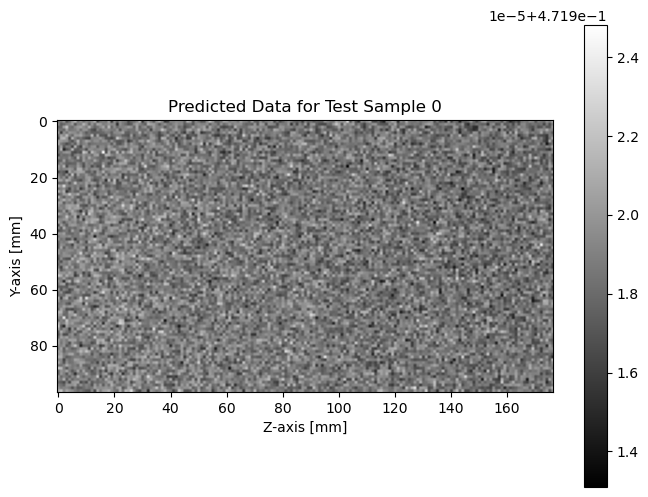

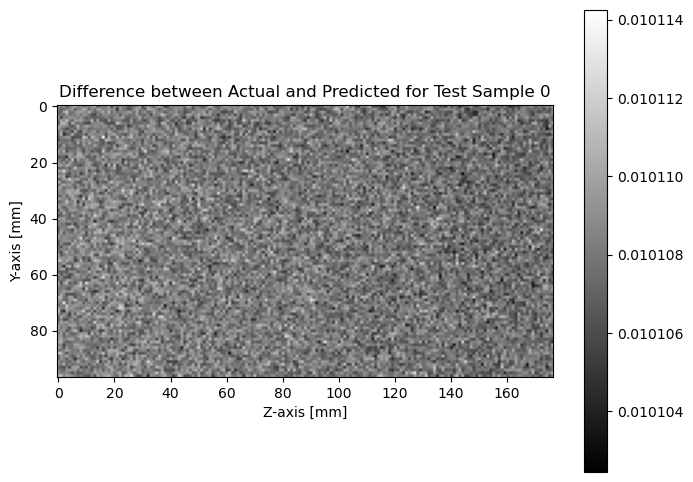

Sample 0 Prediction vs Actual (Flattened):
Predicted (First 10 values): [0.46565226 0.4655724  0.46557787 0.46562636 0.4655164  0.4656199
 0.46562827 0.46560347 0.46558243 0.46553695]
Actual (First 10 values): [0.46555173 0.46555176 0.4655518  0.46555182 0.46555185 0.46555185
 0.46555188 0.4655519  0.46555197 0.46555197]




In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape y_test and y_pred for comparison
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_pred_flat = np.array([y.reshape(-1) for y in y_pred])

# Define the indices to plot (first 5 samples)
indices_to_plot = range(1)

# Define slicing parameters for plotting (same as before)
a = slice(2, 179)  # Y-axis (rows)
b = slice(2, 99)   # Z-axis (rows)

# Plotting the first 5 samples
for selected_index in indices_to_plot:
    # Reshape the selected test and predicted data back to (101, 181)
    y_test_selected = y_test_flat[selected_index].reshape(101, 181)
    y_pred_selected = y_pred_flat[selected_index].reshape(101, 181)

    max_y_test_selected = y_test_selected.max()
    min_y_test_selected = y_test_selected.min()

    y_test_selected = (max_y_test_selected - min_y_test_selected)*y_test_selected + min_y_test_selected
    
    max_y_pred_selected = y_pred_selected.max()
    min_y_pred_selected = y_pred_selected.min()

    y_pred_selected = (max_y_pred_selected - min_y_pred_selected)*y_pred_selected + min_y_pred_selected
    
    # Plot actual data
    plt.figure(figsize=(8, 6))
    img_actual = plt.imshow(y_test_selected[b, a], cmap='gray')  # Plot actual data slice
    plt.title(f'Actual Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_actual)  # Add a color bar for scale
    plt.show()

    # Plot predicted data
    plt.figure(figsize=(8, 6))
    img_pred = plt.imshow(y_pred_selected[b, a], cmap='gray')  # Plot predicted data slice
    plt.title(f'Predicted Data for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_pred)  # Add a color bar for scale
    plt.show()

    # Plot difference between actual and predicted
    plt.figure(figsize=(8, 6))
    img_diff = plt.imshow(np.abs(y_test_selected[b, a] - y_pred_selected[b, a]), cmap='gray')  # Plot difference
    plt.title(f'Difference between Actual and Predicted for Test Sample {selected_index}')
    plt.xlabel('Z-axis [mm]')
    plt.ylabel('Y-axis [mm]')
    plt.colorbar(img_diff)  # Add a color bar for scale
    plt.show()

    # Print the actual vs predicted values (flattened for comparison)
    print(f"Sample {selected_index} Prediction vs Actual (Flattened):")
    print("Predicted (First 10 values):", y_pred_flat[selected_index][:10])
    print("Actual (First 10 values):", y_test_flat[selected_index][:10])
    print("\n")


In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define your model
model_small = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dropout(0.2),
    Dense(2**5, activation='relu'),
    Dropout(0.2),
    Dense(2**7, activation='relu'),
    Dropout(0.2),
    Dense(2**9, activation='relu'),
    Dropout(0.2),
    Dense(2**11, activation='relu'),
    Dropout(0.2),
    Dense(2048, activation='sigmoid'),  # Output shape will be (None, 2048)
    Reshape((2048, 1)),  # Reshape to (None, 2048, 1)
])

# Calculate the upsampling factor
upsampling_factor = int(18281 / 2048)  # This will give you the number of repetitions needed

# Define the upsampling layer
# Create a new model that includes the upsampling after reshaping
model_small.add(tf.keras.layers.UpSampling1D(size=upsampling_factor))  # Upsample from 2048 to 18281

# Compile the model
model_small.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model_small.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model (assuming X_train_1 and y_train_flat are prepared)
history = model_small.fit(
    X_train_1, 
    y_train_flat,  # Ensure this is shaped correctly (batch_size, 18281)
    epochs=100, 
    batch_size=32, 
    validation_data=(X_val_1, y_val_flat),  # Ensure validation labels are also shaped correctly
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Get the predictions
predicted_output = model_small.predict(X_test_1)

# Check the shape of the predicted output
print("Predicted Output Shape:", predicted_output.shape)  # Should be (batch_size, 18281, 1)


Epoch 1/100


ValueError: in user code:

    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1198 mean_squared_error
        return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/ops/gen_math_ops.py:10250 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/iiitd/miniconda3/envs/Vickeyconda/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 16384 and 18281 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](mean_squared_error/remove_squeezable_dimensions/Squeeze, IteratorGetNext:1)' with input shapes: [?,16384], [?,18281].


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# Define the UpSampling1D layer
class UpSampling1D(Layer):
    def __init__(self, size=2, **kwargs):
        super(UpSampling1D, self).__init__(**kwargs)
        self.size = int(size)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1] * self.size, input_shape[2])

    def call(self, inputs):
        # Use tf.repeat to upsample the inputs
        return tf.repeat(inputs, self.size, axis=1)

    def get_config(self):
        config = super(UpSampling1D, self).get_config()
        config.update({'size': self.size})
        return config

# Define your original model
model_small = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_1.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**5, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**7, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**9, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(2**11, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(8192, activation='sigmoid')
])

# Compile the model
model_small.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

# Callbacks
checkpoint_small = ModelCheckpoint('best_model_small.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
early_stopping_small = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Prepare your training data (Assuming they are already defined)
y_train_flat = np.array([y.reshape(-1) for y in y_train_1])
y_val_flat = np.array([y.reshape(-1) for y in y_val_1])

# Train the model
history_small = model_small.fit(
    X_train_1, y_train_flat[:, :8192],
    validation_data=(X_val_1, y_val_flat[:, :8192]),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint_small, early_stopping_small]
)

# Step 2: Upsample the output of the model
# Get predictions from the original model
y_pred = model_small.predict(X_test_1)  # Assuming you want to predict on the validation set

# Reshape y_pred for upsampling
y_pred_reshaped = y_pred.reshape((y_pred.shape[0], y_pred.shape[1], 1))  # Reshape to (batch_size, 8192, 1)

# Instantiate the upsampling layer
upsampling_layer = UpSampling1D(size=int(18281 / 8192))  # Calculate the upsampling factor

# Use the upsampling layer to upsample the output
y_upsampled = upsampling_layer(y_pred_reshaped)

# Verify the output shape
print("Upsampled Output Shape:", y_upsampled.shape)  # Should be (batch_size, 18281, 1)


Epoch 1/100
217/217 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.0125 - val_loss: 0.0030 - val_accuracy: 0.0403

Epoch 00001: val_loss improved from inf to 0.00298, saving model to best_model_small.h5
Epoch 2/100
217/217 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 0.0283 - val_loss: 6.4529e-04 - val_accuracy: 0.0605

Epoch 00002: val_loss improved from 0.00298 to 0.00065, saving model to best_model_small.h5
Epoch 3/100
217/217 [==============================] - 1s 4ms/step - loss: 5.0566e-04 - accuracy: 0.0302 - val_loss: 2.2328e-04 - val_accuracy: 0.0605

Epoch 00003: val_loss improved from 0.00065 to 0.00022, saving model to best_model_small.h5
Epoch 4/100
217/217 [==============================] - 1s 4ms/step - loss: 1.8085e-04 - accuracy: 0.0335 - val_loss: 8.2910e-05 - val_accuracy: 0.0605

Epoch 00004: val_loss improved from 0.00022 to 0.00008, saving model to best_model_small.h5
Epoch 5/100
217/217 [===================

In [59]:
y_pred = model_small.predict(X_test_1)  # Assuming you want to predict on the validation set
y_pred_reshaped = y_pred.reshape((y_pred.shape[0], y_pred.shape[1], 1))  # Reshape to (batch_size, 8192, 1)
upsampling_layer = UpSampling1D(size=2)
y_upsampled = upsampling_layer(y_pred_reshaped)
y_upsampled_reshaped = tf.reshape(y_upsampled, (926, 16384))
print("Upsampled Output Shape:", y_upsampled_reshaped.shape)


Upsampled Output Shape: (926, 16384)


In [63]:
# Predict using the trained model on the test set
from tensorflow.keras.models import load_model

model.summary()
y_pred = model.predict(X_test_1)
y_pred_result = (matrices_max-matrices_min)*y_upsampled_reshaped
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_test_flat = y_test_flat[:,:16384].reshape(926 , 16384 , 1)
y_test_result = (matrices_max- matrices_min)*y_test_flat

# Calculate the mean squared error on the test set
from sklearn.metrics import mean_absolute_error
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", test_mse)
test_mse = mean_absolute_error(y_test_flat, y_pred)
print("Test MSE:", (matrices_max- matrices_min)*test_mse)
test_mse_res = mean_absolute_error(y_test_result, y_pred_result)
print("Test MSE:", test_mse_res)

# Optionally, calculate R-squared (optional)
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test_flat, y_pred)
print("Test R^2 Score:", test_r2)

# Predict on some test samples and compare to the actual values from y_train
for i in range(5):  # Check the first 5 predictions
    print(f"Sample {i} Prediction vs Actual:")
    print("Predicted:", y_pred[i][:10])  # Print first 10 values of the predicted output
    print("Actual:", y_test_flat[i][:10])  # Print first 10 values of the actual output

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_39 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_40 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)             

ValueError: Found array with dim 3. None expected <= 2.

In [57]:
y_test_flat = np.array([y.reshape(-1) for y in y_test_1])
y_test_flat[:,:16384].reshape(926 , 16384 , 1)
print(y_test_flat.shape)

(926, 18281)


(926, 16384, 1)


(6942, 18281)
